# Linear models for regression problems

![Linear regression](images/linear_regression.png)




## Ordinary least squares

Linear regression models the **output**, or **target** variable $y \in \mathrm{R}$ as a linear combination of the $P$-dimensional input $\mathbf{x} \in \mathbb{R}^{P}$. Let $\mathbf{X}$ be the $N \times P$ matrix with each row an input vector (with a 1 in the first position), and similarly let $\mathbf{y}$ be the $N$-dimensional vector of outputs in the **training set**, the linear model will predict the $\mathbf{y}$ given $\mathbf{x}$ using the **parameter vector**, or **weight vector** $\mathbf{w} \in \mathbb{R}^P$ according to

$$
\mathbf{y} = \mathbf{X} \mathbf{w} + \boldsymbol{\varepsilon},
$$

where $\boldsymbol{\varepsilon} \in \mathrm{R}^N$ are the **residuals**, or the errors of the prediction. The $\mathbf{w}$ is found by minimizing an **objective function**, which is the **loss function**, $L(\mathbf{w})$, i.e. the error measured on the data. This error is the **sum of squared errors (SSE) loss**.

\begin{align}
L(\mathbf{w}) &= \text{SSE}(\mathbf{w})\\
               &= \sum_i^N (y_i - \mathbf{x}_i^T\mathbf{w})^2\\
               &= (\mathbf{y} - \mathbf{X}^T\mathbf{w})^T (\mathbf{y} - \mathbf{X}^T\mathbf{w})\\
               &= \|\mathbf{y} - \mathbf{X}^T\mathbf{w}\|_2^2,
\end{align}

Minimizing the SSE is the Ordinary Least Square **OLS** regression as objective function.
which is a simple **ordinary least squares (OLS)** minimization whose analytic solution is:
$$
\mathbf{w}_{\text{OLS}} = (\mathbf{X}^T\mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

The gradient of the loss:
$$
\partial\frac{L(\mathbf{w}, \mathbf{X}, \mathbf{y})}{\partial\mathbf{w}} = 2 \sum_i \mathbf{x}_i (\mathbf{x}_i \cdot \mathbf{w} - y_i)
$$

## Linear regression with scikit-learn

Scikit learn offer many models for supervised learning, and they all follow the same application programming interface (API), namely:

```
model = Estimator()
model.fit(X, y)
predictions = model.predict(X)
```

In [38]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn import datasets
import sklearn.linear_model as lm
import sklearn.metrics as metrics

from mpl_toolkits.mplot3d import Axes3D

np.set_printoptions(precision=2)
#pd.set_option('precision', 2)

# %% Plot linear regression plan (in 2d)

# Get the current working directory
current_directory = os.getcwd()

# Define the file name
file_name = 'Advertising.csv'

# Construct the full file path
csv_raw = os.path.join(current_directory, file_name)
csv = pd.read_csv(csv_raw)
csv.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


R-squared = 0.8971942610828957
Coefficients = [0.05 0.19] 2.9210999124051362


C:\Users\sridevi.tandley\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


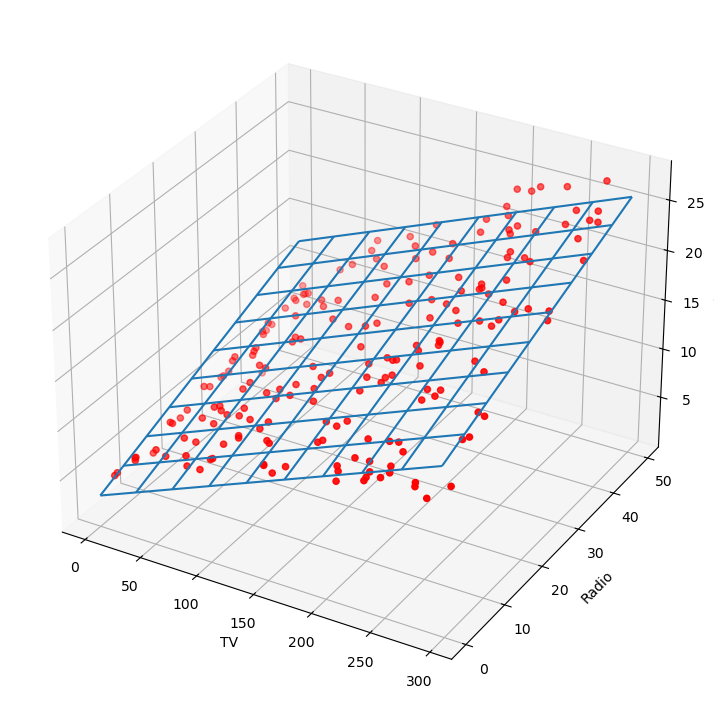

In [88]:
X = csv[['TV', 'Radio']]
y = csv['Sales']

lr = lm.LinearRegression().fit(X, y)
y_pred = lr.predict(X)
print("R-squared =", metrics.r2_score(y, y_pred))

print("Coefficients =", lr.coef_, lr.intercept_)

# Plot
fig = plt.figure(figsize=(9, 9))
#fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(csv['TV'], csv['Radio'], csv['Sales'], c='r', marker='o')

xx1, xx2 = np.meshgrid(
    np.linspace(csv['TV'].min(), csv['TV'].max(), num=10),
    np.linspace(csv['Radio'].min(), csv['Radio'].max(), num=10))

XX = np.column_stack([xx1.ravel(), xx2.ravel()])

yy = lr.predict(XX)
ax.plot_wireframe(xx1, xx2, yy.reshape(xx1.shape))
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
_ = ax.set_zlabel('Sales')

#plt.savefig("/images/linear_regression_plan1.png")

Linear regression of `Advertising.csv` dataset with TV and Radio advertising as input features and Sales as target. The linear model that minimizes the MSE is a plan (2 input features) defined as: Sales = 0.05 TV + .19 Radio + 3:

![Linear regression](images/linear_regression_plan.png)


## Overfitting

In statistics and machine learning, overfitting occurs when a statistical model describes random errors or noise instead of the underlying relationships. Overfitting generally occurs when a model is **excessively complex**, such as having **too many parameters relative to the number of observations**. A model that has been overfit will generally have poor predictive performance, as it can exaggerate minor fluctuations in the data.

A learning algorithm is trained using some set of training samples. If the learning algorithm has the capacity to overfit the training samples the performance on the **training sample set** will improve while the performance on unseen **test sample set** will decline.

The overfitting phenomenon has three main explanations:
 - excessively complex models,
 - multicollinearity, and
 - high dimensionality.

### Model complexity

Complex learners with too many parameters relative to the number of observations may overfit the training dataset.


### Multicollinearity

**Predictors are highly correlated**, meaning that one can be linearly predicted from the others. In this situation the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. 

**Multicollinearity** does not reduce the predictive power or reliability of the model as a whole, at least not within the sample data set; it only affects computations regarding individual predictors. That is, a multiple regression model with correlated predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others. In case of perfect multicollinearity the predictor matrix is singular and therefore cannot be inverted. 

Under these circumstances, for a general linear model $\mathbf{y} = \mathbf{X} \mathbf{w} + \boldsymbol{\varepsilon}$, the ordinary least-squares estimator, $\mathbf{w}_{OLS} = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T \mathbf{y}$, does not exist.

**An example where correlated predictor may produce an unstable model follows:**
We want to predict the business potential (pb) of some companies given their business volume (bv) and the taxes (tx) they are paying. Here pb ~ 10% of bv.
However, taxes = 20% of bv (tax and bv are highly collinear), therefore there is an infinite number of linear combinations of tax and bv that lead to the same prediction. 
**Solutions with very large coefficients will produce excessively large predictions.**

In [42]:
bv = np.array([10, 20, 30, 40, 50])             # business volume
tax  = .2 * bv                                  # Tax
bp = .1 * bv + np.array([-.1, .2, .1, -.2, .1]) # business potential

X = np.column_stack([bv, tax])
beta_star = np.array([.1, 0])  # true solution

'''
Since tax and bv are correlated, there is an infinite number of linear combinations
leading to the same prediction.
'''

# 10 times the bv then subtract it 9 times using the tax variable: 
beta_medium = np.array([.1 * 10, -.1 * 9 * (1/.2)])
# 100 times the bv then subtract it 99 times using the tax variable: 
beta_large = np.array([.1 * 100, -.1 * 99 * (1/.2)])

print("L2 norm of coefficients: small:%.2f, medium:%.2f, large:%.2f." % 
      (np.sum(beta_star ** 2), np.sum(beta_medium ** 2), np.sum(beta_large ** 2)))

print("However all models provide the exact same predictions.")
assert np.all(np.dot(X, beta_star) == np.dot(X, beta_medium))
assert np.all(np.dot(X, beta_star) == np.dot(X, beta_large))

L2 norm of coefficients: small:0.01, medium:21.25, large:2550.25.
However all models provide the exact same predictions.


Multicollinearity between the predictors:  business volumes and tax produces unstable models with arbitrary large coefficients.
![Multicollinearity between the predictors](images/ols_multicollinearity.png)

Dealing with multicollinearity:

- Regularisation by e.g. $\ell_2$ shrinkage: Introduce a bias in the solution by making $(X^T X)^{-1}$ non-singular. See $\ell_2$ shrinkage.

- Feature selection: select a small number of features. See: Isabelle Guyon and André Elisseeff *An introduction to variable and feature selection* The Journal of Machine Learning Research, 2003.

- Feature selection: select a small number of features using $\ell_1$ shrinkage.

- Extract few independent (uncorrelated) features using e.g. principal components analysis (PCA), partial least squares regression (PLS-R) or regression methods that cut the number of predictors to a smaller set of uncorrelated components.


### High dimensionality

High dimensions means a large number of input features. Linear predictor associate one parameter to each input feature, so a high-dimensional situation ($P$, number of features, is large) with a relatively small number of samples $N$ (so-called large $P$ small $N$ situation) generally lead to an overfit of the training data. Thus it is generally a bad idea to add many input features into the learner. This phenomenon is called the **curse of dimensionality**.

One of the most important criteria to use when choosing a learning algorithm is based on the relative size of $P$ and $N$.

- Remenber that the "covariance" matrix $\mathbf{X}^T\mathbf{X}$ used in the linear model is a $P \times P$ matrix of rank $\min(N, P)$. Thus if $P > N$ the equation system is overparameterized and admit an infinity of solutions that might be specific to the learning dataset. See also ill-conditioned or singular matrices.

- The sampling density of $N$ samples in an $P$-dimensional space is proportional to $N^{1/P}$. Thus a high-dimensional space becomes very sparse, leading to poor estimations of samples densities. To preserve a constant density, an exponential growth in the number of observations is required. 50 points in 1D, would require 2 500 points in 2D and 125 000 in 3D!

- Another consequence of the sparse sampling in high dimensions is that all sample points are close to an edge of the sample. Consider $N$ data points uniformly distributed in a $P$-dimensional unit ball centered at the origin. Suppose we consider a nearest-neighbor estimate at the origin. The median distance from the origin to the closest data point is given by the expression: $d(P, N) = \left(1 - \frac{1}{2}^{1/N}\right)^{1/P}.$

A more complicated expression exists for the mean distance to the closest point. For N = 500, P = 10 , $d(P, N ) \approx 0.52$, more than halfway to the boundary. Hence most data points are closer to the boundary of the sample space than to any other data point. The reason that this presents a problem is that prediction is much more difficult near the edges of the training sample. One must extrapolate from neighboring sample points rather than interpolate between them.
*(Source: T Hastie, R Tibshirani, J Friedman. *The Elements of Statistical Learning: Data Mining, Inference, and Prediction.* Second Edition, 2009.)*

- Structural risk minimization provides a theoretical background of this phenomenon. (See VC dimension.)

- See also bias–variance trade-off.

## Regularization using penalization of coefficients

Regarding linear models, overfitting generally leads to excessively complex solutions (coefficient vectors), accounting for noise or spurious correlations within predictors. **Regularization** aims to alleviate this phenomenon by constraining (biasing or reducing) the capacity of the learning algorithm in order to promote simple solutions. Regularization penalizes "large" solutions forcing the coefficients to be small, i.e. to shrink them toward zeros.

The objective function $J(\mathbf{w})$ to minimize with respect to $\mathbf{w}$ is composed of a loss function $L(\mathbf{w})$ for goodness-of-fit and a penalty term $\Omega(\mathbf{w})$ (regularization to avoid overfitting). This is a trade-off where the respective contribution of the loss and the penalty terms is controlled by the regularization parameter $\lambda$.

Therefore the **loss function** $L(\mathbf{w})$ is combined with a **penalty function** $\Omega(\mathbf{w})$ leading to the general form:

$$
J(\mathbf{w}) = L(\mathbf{w}) + \lambda \Omega(\mathbf{w}).
$$

The respective contribution of the loss and the penalty is controlled by the **regularization parameter** $\lambda$.

For regression problems the loss is the SSE given by:

\begin{align*}
L(\mathbf{w}) = SSE(\mathbf{w}) &= \sum_i^N (y_i - \mathbf{x}_i^T\mathbf{w})^2\\
&= \|\mathbf{y} - \mathbf{x}\mathbf{w}\|_2^2
\end{align*}

Popular penalties are:

- Ridge (also called $\ell_2$) penalty: $\|\mathbf{w}\|_2^2$. It shrinks coefficients toward 0.
- Lasso (also called $\ell_1$) penalty: $\|\mathbf{w}\|_1$. It performs feature selection by setting some coefficients to 0.
- ElasticNet (also called $\ell_1\ell_2$) penalty: $\alpha \left(\rho~\|\mathbf{w}\|_1 + (1-\rho)~\|\mathbf{w}\|_2^2 \right)$. It performs selection of group of correlated features by setting some coefficients to 0.


The next figure shows the predicted performance (r-squared) on train and test sets with an increasing number of input features. The number of predictive features is always 10% of the total number of input features. Therefore, the signal to noise ratio (SNR) increases by increasing the number of input features. The performances on the training set rapidly reach 100% (R2=1). However, the performance on the test set decreases with the increase of the input dimensionality. The difference between the train and test performances (blue shaded region) depicts the overfitting phenomena. Regularisation using penalties of the coefficient vector norm greatly limits the overfitting phenomena. 

![Multicollinearity between the predictors](images/linear_regression_penalties.png)

With scikit-learn:

[ 0.84  0.69 -1.39 87.83 41.06]
[ 0.    0.   -0.   96.85 44.67]


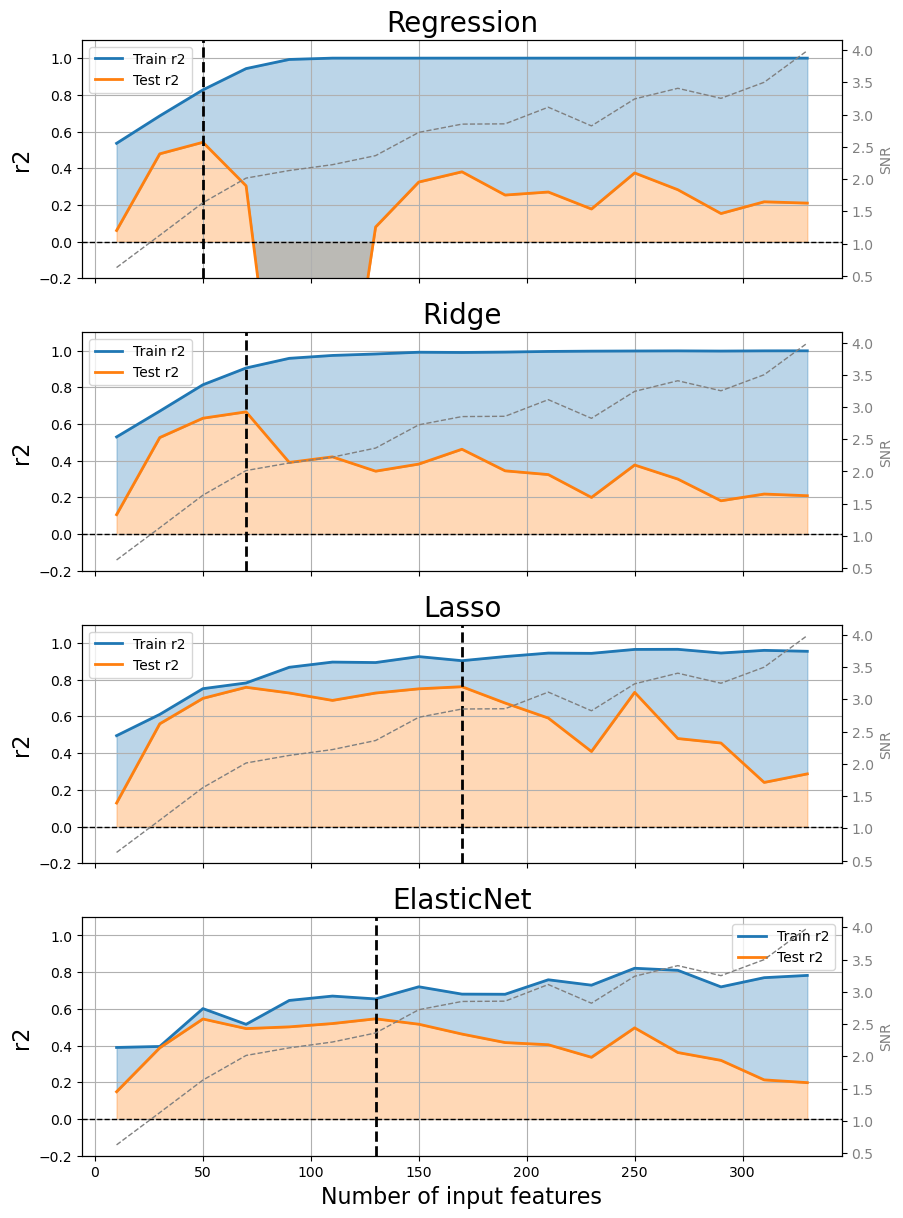

In [45]:
#Replicating Linear Reg Penality Charts
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # nicer plots
import sklearn.metrics as metrics
import sklearn.linear_model as lm

# %% Plot train/test with inreasing size

def fit_on_increasing_size(model):
    n_samples = 100
    n_features_ = np.arange(10, 350, 20)
    r2_train, r2_test, snr = [], [], []
    for n_features in n_features_:
        # Sample the dataset (* 2 nb of samples)
        n_features_info = int(n_features / 10)
        np.random.seed(27)  # Make reproducible 27
        X = np.random.randn(n_samples * 2, n_features)
        beta = np.zeros(n_features)
        beta[:n_features_info] = .7
        Xbeta = np.dot(X, beta)
        eps = np.random.randn(n_samples * 2)
        y =  Xbeta + eps
        # Split the dataset into train and test sample
        Xtrain, Xtest = X[:n_samples, :], X[n_samples:, :]
        ytrain, ytest = y[:n_samples], y[n_samples:]
        # fit/predict
        lr = model.fit(Xtrain, ytrain)
        y_pred_train = lr.predict(Xtrain)
        y_pred_test = lr.predict(Xtest)
        snr.append(Xbeta.std() / eps.std())
        r2_train.append(metrics.r2_score(ytrain, y_pred_train))
        r2_test.append(metrics.r2_score(ytest, y_pred_test))
    return n_features_, np.array(r2_train), np.array(r2_test), np.array(snr)

def plot_r2_snr(n_features_, r2_train, r2_test, xvline, snr, ax, title):
    """
    Two scales plot. Left y-axis: train test r-squared. Right y-axis SNR.
    """
    ax.plot(n_features_, r2_train, label="Train r2", linewidth=2, color=sns.color_palette()[0])
    ax.plot(n_features_, r2_test, label="Test r2", linewidth=2, color=sns.color_palette()[1])
    ax.axvline(x=xvline, linewidth=2, color='k', ls='--')
    ax.fill_between(n_features_, r2_test, 0, alpha=.3, color=sns.color_palette()[1])
    ax.fill_between(n_features_, r2_test, r2_train, alpha=.3, color=sns.color_palette()[0])
    ax.axhline(y=0, linewidth=1, color='k', ls='--')
    ax.set_ylim(-0.2, 1.1)
    ax.set_ylabel("r2", fontsize=16)
    ax.legend(loc='best')
    ax.grid(True)
    ax.set_title(title, fontsize=20)
    ax_right = ax.twinx()
    ax_right.plot(n_features_, snr, '--', color='gray', label="SNR", linewidth=1)
    ax_right.set_ylabel("SNR", color='gray')
    for tl in ax_right.get_yticklabels():
        tl.set_color('gray')

# plot
fig, axis = plt.subplots(4, 1, figsize=(9, 12), sharex=True)


# %% No regularization

mod = lm.LinearRegression()
n_features, r2_train, r2_test, snr = fit_on_increasing_size(model=mod)
argmax = n_features[np.argmax(r2_test)]
plot_r2_snr(n_features, r2_train, r2_test, argmax, snr, axis[0], 'Regression')

# %% L2 regularization

mod = lm.Ridge(alpha=10)  # lambda is alpha!
n_features, r2_train, r2_test, snr = fit_on_increasing_size(model=mod)
argmax = n_features[np.argmax(r2_test)]
plot_r2_snr(n_features, r2_train, r2_test, argmax, snr, axis[1], 'Ridge')

# %% L1 regularization

mod = lm.Lasso(alpha=.1)  # lambda is alpha !
n_features, r2_train, r2_test, snr = fit_on_increasing_size(model=mod)
argmax = n_features[np.argmax(r2_test)]
plot_r2_snr(n_features, r2_train, r2_test, argmax, snr, axis[2], 'Lasso')


# %% L1-L2 regularization

mod = lm.ElasticNet(alpha=.5, l1_ratio=.5)
n_features, r2_train, r2_test, snr = fit_on_increasing_size(model=mod)
argmax = n_features[np.argmax(r2_test)]
plot_r2_snr(n_features, r2_train, r2_test, argmax, snr, axis[3], 'ElasticNet')



plt.tight_layout()
axis[3].set_xlabel("Number of input features", fontsize=16)
#plt.savefig("/images/linear_regression_penalties1.png")

# %% Codes examples:

from sklearn import datasets
import  sklearn.linear_model as lm

X, y = datasets.make_regression(n_features=5, n_informative=2, random_state=0)

lr = lm.LinearRegression().fit(X, y)

l2 = lm.Ridge(alpha=10).fit(X, y)  # lambda is alpha!
print(l2.coef_)

l1 = lm.Lasso(alpha=1).fit(X, y)  # lambda is alpha !
print(l1.coef_)

l1l2 = lm.ElasticNet(alpha=1, l1_ratio=.9).fit(X, y)

In [46]:
# Dataset with some correlation
X, y, coef = datasets.make_regression(n_samples=100, n_features=10, n_informative=5, random_state=0,
                                      effective_rank=3, coef=True)

lr = lm.LinearRegression().fit(X, y)

l2 = lm.Ridge(alpha=10).fit(X, y)  # lambda is alpha!

l1 = lm.Lasso(alpha=.1).fit(X, y)  # lambda is alpha !

l1l2 = lm.ElasticNet(alpha=.1, l1_ratio=.9).fit(X, y)

pd.DataFrame(np.vstack((coef, lr.coef_, l2.coef_, l1.coef_, l1l2.coef_)),
             index=['True', 'lr', 'l2', 'l1', 'l1l2'])

,0,1,2,3,4,5,6,7,8,9
True,28.488552,0.000000e+00,13.168728,0.000000e+00,48.968491,70.440154,39.701367,0.000000e+00,0.000000e+00,0.000000e+00
lr,28.488552,1.833457e-14,13.168728,-6.480454e-14,48.968491,70.440154,39.701367,-9.797221e-16,6.899062e-14,2.973537e-15
l2,1.030470,2.109881e-01,0.930134,-3.162376e-01,1.823256,1.567478,2.104319,-1.136230e+00,-8.390215e-01,-1.021009e+00
l1,0.000000,-0.000000e+00,0.000000,-0.000000e+00,24.398815,25.156259,25.359984,-0.000000e+00,-0.000000e+00,-0.000000e+00
l1l2,0.778541,0.000000e+00,0.509612,-0.000000e+00,7.196725,5.705429,8.945742,-1.376121e+00,-0.000000e+00,-4.012637e-01


## Ridge regression ($\ell_2$-regularization)

Ridge regression impose a $\ell_2$ penalty on the coefficients, i.e. it penalizes with the Euclidean norm of the coefficients while minimizing SSE. The objective function becomes:

\begin{align}
\text{Ridge}(\mathbf{w}) &= \sum_i^N (y_i - \mathbf{x}_i^T\mathbf{w})^2 + \lambda \|\mathbf{w}\|_2^2\\
&= \|\mathbf{y} - \mathbf{x}\mathbf{w}\|_2^2 + \lambda \|\mathbf{w}\|_2^2.
\end{align}


The $\mathbf{w}$ that minimises $F_{Ridge}(\mathbf{w})$ can be found by the following derivation:

\begin{align}
\nabla_{\mathbf{w}}\text{Ridge}(\mathbf{w}) &= 0\\
\nabla_{\mathbf{w}}\big((\mathbf{y} - \mathbf{X}\mathbf{w})^T (\mathbf{y} - \mathbf{X}\mathbf{w}) + \lambda \mathbf{w}^T\mathbf{w}\big) &= 0\\
\nabla_{\mathbf{w}}\big((\mathbf{y}^T\mathbf{y} - 2 \mathbf{w}^T\mathbf{X}^T\mathbf{y} + \mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w} + \lambda \mathbf{w}^T\mathbf{w})\big) &= 0\\
-2\mathbf{X}^T\mathbf{y} + 2 \mathbf{X}^T\mathbf{X}\mathbf{w} + 2 \lambda \mathbf{w} &= 0\\
-\mathbf{X}^T\mathbf{y} + (\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I}) \mathbf{w} &= 0\\
(\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I}) \mathbf{w} &= \mathbf{x}^T\mathbf{y}\\
\mathbf{w} &= (\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{x}^T\mathbf{y}
\end{align}

- The solution adds a positive constant to the diagonal of $\mathbf{X}^T\mathbf{X}$ before inversion. This makes the problem nonsingular, even if $\mathbf{X}^T\mathbf{X}$ is not of full rank, and was the main motivation behind ridge regression.

- Increasing $\lambda$ shrinks the $\mathbf{w}$ coefficients toward 0.

- This approach **penalizes** the objective function by the **Euclidian ($\ell_2$) norm** of the coefficients such that solutions with large coefficients become unattractive.

The gradient of the loss:
$$
\partial\frac{L(\mathbf{w}, \mathbf{X}, \mathbf{y})}{\partial\mathbf{w}} = 2 (\sum_i \mathbf{x}_i (\mathbf{x}_i \cdot \mathbf{w} - y_i) + \lambda \mathbf{w})
$$

## Lasso regression ($\ell_1$-regularization)

Lasso regression penalizes the coefficients by the $\ell_1$ norm. This constraint will reduce (bias) the capacity of the learning algorithm. To add such a penalty forces the coefficients to be small, i.e. it shrinks them toward zero. The objective function to minimize becomes:

\begin{align}
\text{Lasso}(\mathbf{w}) &= \sum_i^N (y_i - \mathbf{x}_i^T\mathbf{w})^2 + \lambda\|\mathbf{w}\|_1.
\end{align}

This penalty forces some coefficients to be exactly zero, providing a feature selection property.

### Sparsity of the $\ell_1$ norm

#### Occam's razor

Occam's razor (also written as Ockham's razor, and **lex parsimoniae** in Latin, which means law of parsimony) is a problem solving principle attributed to William of Ockham (1287-1347), who was an English Franciscan friar and scholastic philosopher and theologian. The principle can be interpreted as stating that **among competing hypotheses, the one with the fewest assumptions should be selected**.

#### Principle of parsimony

The simplest of two competing theories is to be preferred. Definition of parsimony: Economy of explanation in conformity with Occam's razor.

Among possible models with similar loss, choose the simplest one: 

- Choose the model with the smallest coefficient vector, i.e. smallest $\ell_2$ ($\|\mathbf{w}\|_2$) or $\ell_1$ ($\|\mathbf{w}\|_1$) norm of $\mathbf{w}$, i.e. $\ell_2$ or $\ell_1$ penalty. See also bias-variance tradeoff.

- Choose the model that uses the smallest number of predictors. In other words, choose the model that has many predictors with zero weights. Two approaches are available to obtain this: (i) Perform a feature selection as a preprocessing prior to applying the learning algorithm, or (ii) embed the feature selection procedure within the learning process.

#### Sparsity-induced penalty or embedded feature selection with the $\ell_1$ penalty

The penalty based on the $\ell_1$ norm promotes **sparsity** (scattered, or not dense): it forces many coefficients to be exactly zero. This also makes the coefficient vector scattered.

The figure bellow illustrates the OLS loss under a constraint acting on the $\ell_1$ norm of the coefficient vector. I.e., it illustrates the following optimization problem:

$$
\begin{aligned}
    \underset{\mathbf{w}}{\text{minimize}} ~& \|\mathbf{y} - \mathbf{X}\mathbf{w}\|_2^2 \\
    \text{subject to}                 ~& \|\mathbf{w}\|_1 \leq 1.
\end{aligned}
$$

![Sparsity of L1 norm](images/l1_sparse.png)

### Optimization issues

*Section to be completed*

- No more closed-form solution.

- Convex but not differentiable.

- Requires specific optimization algorithms, such as the fast iterative shrinkage-thresholding algorithm (FISTA): Amir Beck and Marc Teboulle, *A Fast Iterative Shrinkage-Thresholding Algorithm for Linear Inverse Problems* SIAM J. Imaging Sci., 2009.

The ridge penalty shrinks the coefficients toward zero. The figure illustrates: the OLS solution on the left. The $\ell_1$ and $\ell_2$ penalties in the middle pane. The penalized OLS in the right pane. The right pane shows how the penalties shrink the coefficients toward zero. The black points are the minimum found in each case, and the white points represents the true solution used to generate the data.

![$\ell_1$ and $\ell_2$ shrinkages](images/ols_l1_l2.png)

## Elastic-net regression ($\ell_1$-$\ell_2$-regularization)

The Elastic-net estimator combines the $\ell_1$ and $\ell_2$ penalties, and results in the problem to

\begin{align}
\text{Enet}(\mathbf{w}) &= \sum_i^N (y_i - \mathbf{x}_i^T\mathbf{w})^2 + \alpha \left(\rho~\|\mathbf{w}\|_1 + (1-\rho)~\|\mathbf{w}\|_2^2 \right),
\end{align}

where $\alpha$ acts as a global penalty and $\rho$ as an $\ell_1 / \ell_2$ ratio.

### Rational

- If there are groups of highly correlated variables, Lasso tends to arbitrarily select only one from each group. These models are difficult to interpret because covariates that are strongly associated with the outcome are not included in the predictive model. Conversely, the elastic net encourages a grouping effect, where strongly correlated predictors tend to be in or out of the model together.

- Studies on real world data and simulation studies show that the elastic net often outperforms the lasso, while enjoying a similar sparsity of representation.

## Regression performance evaluation metrics: R-squared, MSE and MAE

Common regression [metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) are:

- $R^2$ : R-squared
- MSE: Mean Squared Error
- MAE: Mean Absolute Error


### R-squared

The goodness of fit of a statistical model describes how well it fits a set of observations. Measures of goodness of fit typically summarize the discrepancy between observed values and the values expected under the model in question. We will consider the **explained variance**  also known as the coefficient of determination, denoted $R^2$ pronounced **R-squared**.

The total sum of squares, $SS_\text{tot}$ is the sum of the sum of squares explained by the regression, $SS_\text{reg}$, plus the sum of squares of residuals unexplained by the regression, $SS_\text{res}$, also called the SSE, i.e. such that

$$
SS_\text{tot} = SS_\text{reg} + SS_\text{res}
$$

![title](images/Coefficient_of_Determination.png)

The mean of $y$ is

$$
\bar{y} = \frac{1}{n}\sum_i y_i.
$$

The total sum of squares is the total squared sum of deviations from the mean of $y$, i.e.

$$
SS_\text{tot}=\sum_i (y_i-\bar{y})^2
$$

The regression sum of squares, also called the explained sum of squares:

$$
SS_\text{reg} = \sum_i (\hat{y}_i -\bar{y})^2,
$$

where $\hat{y}_i = \beta x_i + \beta_0$ is the estimated value of salary $\hat{y}_i$ given a value of experience $x_i$.

The sum of squares of the residuals (**SSE, Sum Squared Error**), also called the residual sum of squares (RSS) is:

$$
SS_\text{res}=\sum_i (y_i - \hat{y_i})^2.
$$

$R^2$ is the explained sum of squares of errors. It is the variance explain by the regression divided by the total variance, i.e.

$$
R^2 = \frac{\text{explained SS}}{\text{total SS}}
    = \frac{SS_\text{reg}}{SS_{tot}} 
    = 1 - {SS_{res}\over SS_{tot}}.
$$

_Test_

Let $\hat{\sigma}^2 = SS_\text{res} / (n-2)$ be an estimator of the variance of $\epsilon$. The $2$ in the denominator stems from the 2 estimated parameters: intercept and coefficient.

- **Unexplained variance**: $\frac{SS_\text{res}}{\hat{\sigma}^2} \sim \chi_{n-2}^2$

- **Explained variance**: $\frac{SS_\text{reg}}{\hat{\sigma}^2} \sim \chi_{1}^2$. The single degree of freedom comes from the difference between $\frac{SS_\text{tot}}{\hat{\sigma}^2} (\sim \chi^2_{n-1})$ and $\frac{SS_\text{res}}{\hat{\sigma}^2} (\sim \chi_{n-2}^2)$, i.e. $(n-1) - (n-2)$ degree of freedom.

The Fisher statistics of the ratio of two variances:
$$
    F = \frac{\text{Explained variance}}{\text{Unexplained variance}} = \frac{SS_\text{reg} / 1}{ SS_\text{res} / (n - 2)} \sim F(1, n-2)
$$

Using the $F$-distribution, compute the probability of observing a value greater than $F$ under $H_0$, i.e.: $P(x > F|H_0)$, i.e. the survival function $(1 - \text{Cumulative Distribution Function})$ at $x$ of the given $F$-distribution.

In [47]:
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

X, y = datasets.make_regression(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

lr = lm.LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

r2 = metrics.r2_score(y_test, yhat)
mse = metrics.mean_squared_error(y_test, yhat)
mae = metrics.mean_absolute_error(y_test, yhat)

print("r2: %.3f, mae: %.3f, mse: %.3f" % (r2, mae, mse))

r2: 0.055, mae: 71.658, mse: 7846.083


In pure numpy:

In [48]:
res = y_test - lr.predict(X_test)

y_mu = np.mean(y_test)
ss_tot = np.sum((y_test - y_mu) ** 2)
ss_res = np.sum(res ** 2)

r2 = (1 - ss_res / ss_tot)
mse = np.mean(res ** 2)
mae = np.mean(np.abs(res))

print("r2: %.3f, mae: %.3f, mse: %.3f" % (r2, mae, mse))

r2: 0.055, mae: 71.658, mse: 7846.083


# Use Case on Multiple Regression:

## Detailed explanation of each step in building a regression model, including the concepts and rationale behind each step:

### **1. Load and Explore the Dataset**

#### **Concept:**
- **Loading Data:** This step involves reading the dataset into a DataFrame for analysis. The dataset typically contains multiple features (predictors) and a target variable (response) that you want to predict.
- **Exploring Data:** Initial exploration helps understand the structure, types, and distributions of data. It provides insights into data quality and informs preprocessing decisions.

#### **Why:**
- To understand the content and quality of the dataset.
- To identify any immediate issues, such as missing values, outliers, or unusual distributions that need addressing.

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  TARGET  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%       

C:\Users\sridevi.tandley\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sridevi.tandley\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sridevi.tandley\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sridevi.tandley\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

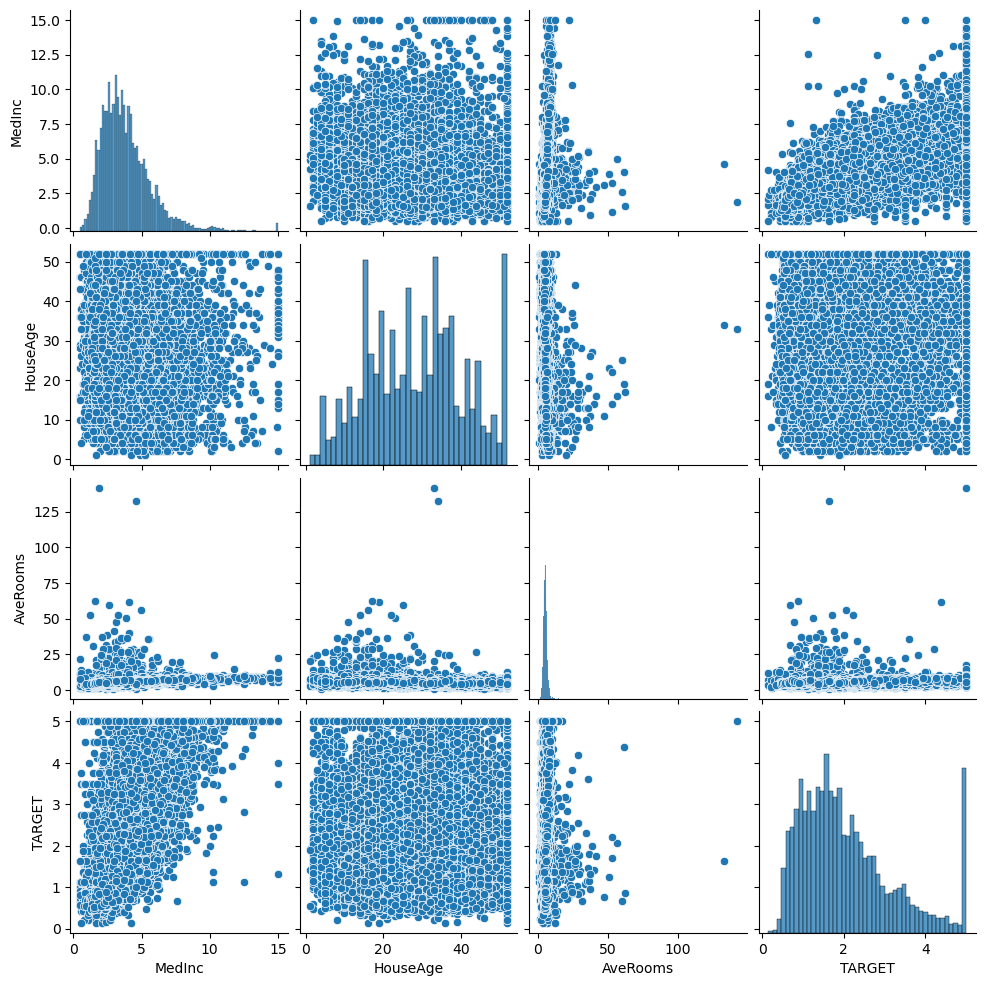

In [71]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['TARGET'] = california.target  # Rename target column for clarity

# Explore the dataset
print(df.head())
print(df.describe())
print(df.info())

# Visualize the relationships between features and target
sns.pairplot(df[['MedInc', 'HouseAge', 'AveRooms', 'TARGET']])
plt.show()


 **Explanation:**
- **Head and Describe:** Displays the first few rows, summary statistics, and data types to understand the dataset.
- **Pairplot:** Visualizes relationships between selected features and the target variable. Displays scatter plots and histograms for selected features and the target variable, helping to understand relationships and distributions.

### **2. Data Preprocessing**

#### **Concept:**
- **Feature and Target Separation:** Split the dataset into features (X) and the target variable (y). This separation is necessary for training the model.
- **Train-Test Split:** Divide the data into training and test sets. The training set is used to train the model, while the test set is used to evaluate its performance.
- **Standardization:** Scale features so they have similar ranges or distributions. This is crucial because many machine learning algorithms perform better when features are on a similar scale.

#### **Why:**
- **Separation:** To ensure the model is trained and tested on separate data to evaluate its generalization capability.
- **Standardization:** To improve convergence and performance of the model, especially when features have different units or scales.

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df.drop('TARGET', axis=1)
y = df['TARGET']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Explanation:**
- **Train/Test Split:** Divides the data into training (80%) and test (20%) sets to evaluate model performance on unseen data.
- **Standardization:** Scales features to have mean 0 and variance 1, which helps improve model performance and convergence.

### **3. Feature Engineering**

#### **Concept:**
- **Feature Engineering:** This includes creating new features or transforming existing ones to better capture the underlying patterns in the data. Examples include polynomial features or interaction terms.

#### **Why:**
- To enhance the model’s ability to capture relationships between features and the target variable, potentially improving predictive performance.

In [73]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import KBinsDiscretizer

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train_scaled)

# Create a DataFrame for the polynomial features
poly_feature_names = poly.get_feature_names_out(input_features=X.columns)
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)

# Binning (e.g., binning the 'MedInc' feature into discrete intervals)
binner = KBinsDiscretizer(n_bins=5, encode='onehot-dense', strategy='uniform')
X_binned = binner.fit_transform(X_train_scaled[:, X.columns.get_loc('MedInc')].reshape(-1, 1))

# Combine original features with polynomial and binned features
import numpy as np

X_train_combined = np.hstack((X_train_scaled, X_poly_df))
X_test_combined = np.hstack((X_test_scaled, poly.transform(X_test_scaled)))

print("Feature Engineering completed. New feature shape:", X_train_combined.shape)

Feature Engineering completed. New feature shape: (16512, 52)


**Explanation:**
- **Polynomial Features:** Adds interaction terms and polynomial features, capturing non-linear relationships between features and the target.
- **Binning:** Converts continuous variables into discrete bins, which can help capture non-linear relationships in a different way. Converts the continuous 'MedInc' feature into discrete bins, potentially capturing non-linear relationships in a different way.
- **Combined Features:** Merges original, polynomial, and binned features into a single feature set, enriching the dataset for modeling.

### **4. Train Regression Models**

#### **Concept:**
- **Model Training:** Fit regression models on the training data. Common models include:
  - **Linear Regression:** Models the relationship between predictors and the target as a linear function.
  - **Ridge Regression:** Applies L2 regularization to the linear regression model to handle multicollinearity and prevent overfitting.
  - **Lasso Regression:** Applies L1 regularization to the linear regression model, which can shrink some coefficients to zero, leading to feature selection.

#### **Why:**
- To build predictive models and compare their performance. Regularization techniques (Ridge and Lasso) are used to improve model robustness and handle issues like multicollinearity and overfitting.

In [79]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_combined, y_train)
y_pred_linear = linear_model.predict(X_test_combined)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_combined, y_train)
y_pred_ridge = ridge_model.predict(X_test_combined)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_combined, y_train)
y_pred_lasso = lasso_model.predict(X_test_combined)

# Elastic Net Regression
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_model.fit(X_train_combined, y_train)
y_pred_elastic_net = elastic_net_model.predict(X_test_combined)

**Explanation:**
- **Linear Regression:** Fits a simple linear model to the data. This model may overfit, especially with many features.
- **Ridge Regression:** Adds L2 regularization to penalize large coefficients, reducing the impact of multicollinearity and avoid overfitting.
- **Lasso Regression:** Adds L1 penalty, which can shrink some coefficients to zero, performing feature selection. Thus L1 potentially eliminate some coefficients while performing feature selection
- **Elastic Net Regression:** Combines L1 and L2 penalties to balance between Ridge and Lasso.

### **5. Regularization Using Penalization of Coefficients**

#### **Concept:**
- **Regularization Techniques:**
  - **Ridge Regression:** Adds a penalty proportional to the square of the magnitude of coefficients (L2 norm). Helps with multicollinearity by shrinking coefficients.
  - **Lasso Regression:** Adds a penalty proportional to the absolute value of coefficients (L1 norm). Can shrink some coefficients to zero, leading to sparse solutions and feature selection.
  - **Elastic Net:** Combines both L1 and L2 penalties to balance between Ridge and Lasso.

#### **Why:**
- **Regularization:** To prevent overfitting by constraining the size of the coefficients, thus improving the model’s ability to generalize to new data.

In [78]:
# Display coefficients for each model
print("Linear Regression Coefficients:", linear_model.coef_)
print("Ridge Regression Coefficients:", ridge_model.coef_)
print("Lasso Regression Coefficients:", lasso_model.coef_)
print("Elastic Net Regression Coefficients:", elastic_net_model.coef_)

Linear Regression Coefficients: [ 0.47  0.07 -0.19  0.27  0.02 -0.89 -0.64 -0.58  0.47  0.07 -0.19  0.27
  0.02 -0.89 -0.64 -0.58 -0.11  0.04  0.18 -0.12  0.11 -0.1  -0.67 -0.59
  0.03 -0.02  0.05  0.04 -0.28 -0.28 -0.25  0.06 -0.11 -0.15  0.58  0.54
  0.48  0.05  0.24 -0.4  -0.49 -0.42  0.    0.32  0.03  0.02  0.01  0.51
  0.37  0.26  0.44  0.15]
Ridge Regression Coefficients: [ 0.47  0.07 -0.19  0.27  0.02 -0.89 -0.64 -0.58  0.47  0.07 -0.19  0.27
  0.02 -0.89 -0.64 -0.58 -0.11  0.04  0.18 -0.12  0.11 -0.1  -0.66 -0.58
  0.03 -0.02  0.05  0.04 -0.28 -0.28 -0.25  0.06 -0.11 -0.16  0.57  0.54
  0.47  0.05  0.24 -0.39 -0.48 -0.42  0.    0.32  0.03  0.02  0.01  0.5
  0.36  0.26  0.43  0.15]
Lasso Regression Coefficients: [ 6.96e-01  1.03e-01 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00
 -0.00e+00  1.25e-02  1.52e-03 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00
 -0.00e+00 -0.00e+00 -0.00e+00  0.00e+00  0.00e+00 -0.00e+00 -0.00e+00
 -0.00e+00  0.00e+00 -0.00e+00  0.00e+00  0.00e+00  0.00e+

**Explanation:**
- **Coefficients Comparison:** Shows how regularization affects the coefficients. Ridge reduces the magnitude of coefficients, Lasso can set some to zero, and Elastic Net balances both effects.

### **6. Evaluate the Models**

#### **Concept:**
- **Evaluation Metrics:**
  - **R-squared:** Indicates the proportion of variance in the target variable explained by the model. Higher values suggest a better fit.
  - **Mean Squared Error (MSE):** Measures the average squared difference between predicted and actual values. Lower values indicate better performance.
  - **Mean Absolute Error (MAE):** Measures the average absolute difference between predicted and actual values. Lower values suggest better accuracy.

#### **Why:**
- To quantify the performance of the models and determine how well they generalize to new data. These metrics help compare different models and select the best one.

In [80]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Evaluation:")
    print(f"R-squared: {r2_score(y_true, y_pred):.3f}")
    print(f"Mean Squared Error: {mean_squared_error(y_true, y_pred):.3f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_pred):.3f}")
    print()

# Evaluate models
evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")
evaluate_model(y_test, y_pred_elastic_net, "Elastic Net Regression")

Linear Regression Evaluation:
R-squared: 0.646
Mean Squared Error: 0.464
Mean Absolute Error: 0.467

Ridge Regression Evaluation:
R-squared: 0.647
Mean Squared Error: 0.463
Mean Absolute Error: 0.467

Lasso Regression Evaluation:
R-squared: 0.482
Mean Squared Error: 0.678
Mean Absolute Error: 0.620

Elastic Net Regression Evaluation:
R-squared: 0.522
Mean Squared Error: 0.627
Mean Absolute Error: 0.589



**Explanation:**
- **R-squared:** Indicates the proportion of variance explained by the model. Compare R² values across models. Higher R² values indicate better explanatory power.
- **Mean Squared Error (MSE):** Measures the average squared difference between predicted and actual values.
- **Mean Absolute Error (MAE):** Measures the average absolute difference between predicted and actual values.
    - Lower MSE and MAE values indicate better predictive accuracy. Models with lower error metrics are preferred.

### **7. Model Validation**

#### **Concept:**
- **Overfitting Check:** Compare performance on training and test sets. Overfitting occurs when a model performs well on training data but poorly on test data.
- **Multicollinearity Check:** Use Variance Inflation Factor (VIF) to detect multicollinearity. High VIF values indicate that predictors are highly correlated with each other, which can affect model stability.
- **High Dimensionality:** Regularization helps address the challenges posed by high-dimensional data, where the number of features is large relative to the number of samples.

#### **Why:**
- **Overfitting Check:** To ensure the model doesn’t just memorize the training data but generalizes well to unseen data.
- **Multicollinearity Check:** To address issues where high correlations between predictors can lead to unstable coefficient estimates.
- **High Dimensionality:** Regularization methods (Ridge, Lasso) prevent overfitting and manage the complexity of high-dimensional data.

### 7.1. Check for Overfitting
#### Compare training and test performance to check for overfitting.

In [81]:
# Training performance for Linear Regression
train_pred_linear = linear_model.predict(X_train_combined)
print("Training Performance for Linear Regression:")
evaluate_model(y_train, train_pred_linear, "Linear Regression (Train)")

# Training performance for Ridge Regression
train_pred_ridge = ridge_model.predict(X_train_combined)
print("Training Performance for Ridge Regression:")
evaluate_model(y_train, train_pred_ridge, "Ridge Regression (Train)")

# Training performance for Lasso Regression
train_pred_lasso = lasso_model.predict(X_train_combined)
print("Training Performance for Lasso Regression:")
evaluate_model(y_train, train_pred_lasso, "Lasso Regression (Train)")

# Training performance for Elastic Net Regression
train_pred_elastic_net = elastic_net_model.predict(X_train_combined)
print("Training Performance for Elastic Net Regression:")
evaluate_model(y_train, train_pred_elastic_net, "Elastic Net Regression (Train)")

Training Performance for Linear Regression:
Linear Regression (Train) Evaluation:
R-squared: 0.685
Mean Squared Error: 0.421
Mean Absolute Error: 0.461

Training Performance for Ridge Regression:
Ridge Regression (Train) Evaluation:
R-squared: 0.685
Mean Squared Error: 0.421
Mean Absolute Error: 0.461

Training Performance for Lasso Regression:
Lasso Regression (Train) Evaluation:
R-squared: 0.501
Mean Squared Error: 0.667
Mean Absolute Error: 0.616

Training Performance for Elastic Net Regression:
Elastic Net Regression (Train) Evaluation:
R-squared: 0.539
Mean Squared Error: 0.616
Mean Absolute Error: 0.586



**Explanation:**
- **Training vs. Test Performance:** Comparing performance metrics on training and test sets helps identify overfitting. If training performance is significantly better than test performance, overfitting may be present.
- A large gap between training and test metrics suggests overfitting. The model should perform well on both training and test sets for better generalization.

### 7.2. Check for Multicollinearity
#### Detect multicollinearity using Variance Inflation Factor (VIF).

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = np.arange(X.shape[1])
    vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    return vif_data

# Calculate VIF for the combined feature set
vif_df = calculate_vif(X_train_combined)
print("Variance Inflation Factor (VIF):")
print(vif_df)

C:\Users\sridevi.tandley\AppData\Local\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Variance Inflation Factor (VIF):
    Feature           VIF
0         0           inf
1         1           inf
2         2           inf
3         3           inf
4         4           inf
5         5           inf
6         6           inf
7         7           inf
8         8           inf
9         9           inf
10       10           inf
11       11           inf
12       12           inf
13       13           inf
14       14           inf
15       15           inf
16       16  7.933937e+00
17       17  3.051776e+00
18       18  1.417602e+01
19       19  7.772707e+00
20       20  4.249749e+00
21       21  2.729651e+02
22       22  2.870865e+01
23       23  2.663598e+01
24       24  2.211246e+00
25       25  8.659979e+00
26       26  7.697675e+00
27       27  3.467596e+00
28       28  1.720051e+02
29       29  1.279502e+01
30       30  1.278886e+01
31       31  3.679399e+03
32       32  1.162499e+04
33       33  1.589313e+01
34       34  9.173984e+01
35       35  9.958578e+01
36   

**Explanation:**
- **Variance Inflation Factor (VIF):** Measures how much the variance of an estimated regression coefficient increases due to collinearity. High VIF values indicate multicollinearity, which can be mitigated by regularization.

### **Summary**

1. **Load and Explore Data:** Understand the dataset's structure and visualize relationships between features and the target variable.
2. **Data Preprocessing:** Prepare data for modeling by splitting it into training and test sets and standardizing features.
3. **Feature Engineering:** Enhance the model's ability to capture complex patterns by creating polynomial and binned features.
4. **Train Models:** Fit various regression models (Linear, Ridge, Lasso, Elastic Net) to the data.
5. **Regularization:** Apply Ridge, Lasso, and Elastic Net to handle issues like multicollinearity and overfitting, and compare their effects on coefficients.
6. **Evaluate Models:** Assess model performance using metrics like R-squared, MSE, and MAE.
7. **Model Validation:** Check for overfitting by comparing training and test performance, and assess multicollinearity using VIF.

This comprehensive approach covers all key aspects of building, evaluating, and refining regression models using the California Housin dataset.
